In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

In [376]:
data = pd.read_csv('datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [377]:
data.head(10)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12

In [378]:
data.sort_index(inplace=True)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [380]:
#resample the data by 1hour and find the mean to aggregate the values
data = data.resample('1H').sum()

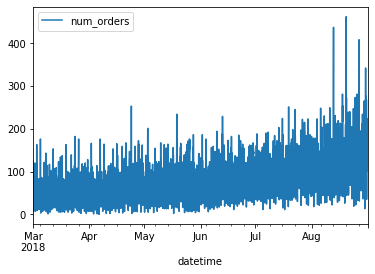

In [381]:
data.plot()

In [382]:
#data['rolling_mean'] = data.rolling(10).mean()

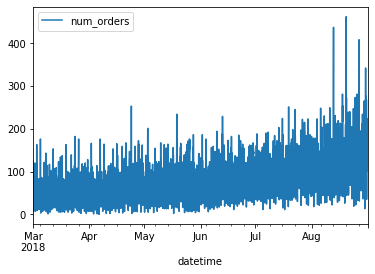

In [383]:
data.plot()

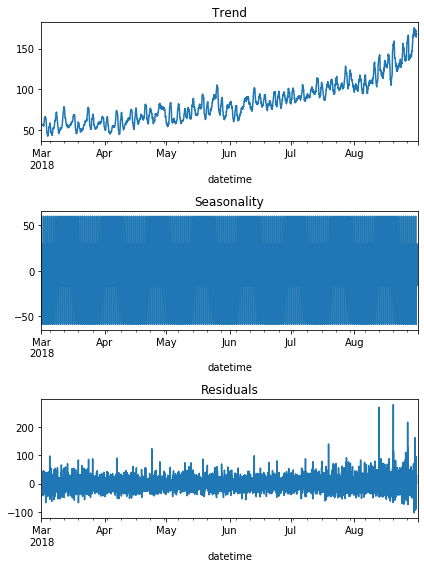

In [384]:
decomposed = seasonal_decompose(data)# < write code here >

plt.figure(figsize=(6, 8))
plt.subplot(311)
# To display the graph correctly, specify its
# axes ax equal to plt.gca() (gca = get current axis)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
# < write code here >
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
# < write code here >
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

*our series has to be made stationary.*

**Stationarity** is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). 
- If the mean of a time-series increases over time, then itâ€™s not stationary.

In [385]:
data = data - data.shift()

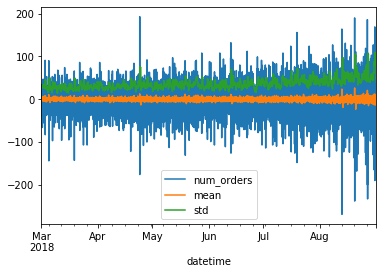

In [386]:
data['mean'] = data['num_orders'].rolling(15).mean()
data['std'] = data['num_orders'].rolling(15).std()
data.plot()

- So, the stationary time series is a series where the mean and standard deviation do not change. 

In [302]:
data_trend = pd.DataFrame(decomposed.trend)

In [308]:
data_trend.head(15)

trend
datetime                      
2018-03-01 00:00:00        NaN
2018-03-01 01:00:00        NaN
2018-03-01 02:00:00        NaN
2018-03-01 03:00:00        NaN
2018-03-01 04:00:00        NaN
2018-03-01 05:00:00        NaN
2018-03-01 06:00:00        NaN
2018-03-01 07:00:00        NaN
2018-03-01 08:00:00        NaN
2018-03-01 09:00:00        NaN
2018-03-01 10:00:00        NaN
2018-03-01 11:00:00        NaN
2018-03-01 12:00:00  56.125000
2018-03-01 13:00:00  56.145833
2018-03-01 14:00:00  56.958333

In [49]:
train, test = train_test_split(data, test_size=0.25, shuffle=False)

In [50]:
train.tail()

num_orders
datetime                       
2018-07-16 19:00:00          94
2018-07-16 20:00:00          61
2018-07-16 21:00:00         111
2018-07-16 22:00:00          85
2018-07-16 23:00:00         102

In [51]:
test.head()

num_orders
datetime                       
2018-07-17 00:00:00         131
2018-07-17 01:00:00         123
2018-07-17 02:00:00         102
2018-07-17 03:00:00          99
2018-07-17 04:00:00         104

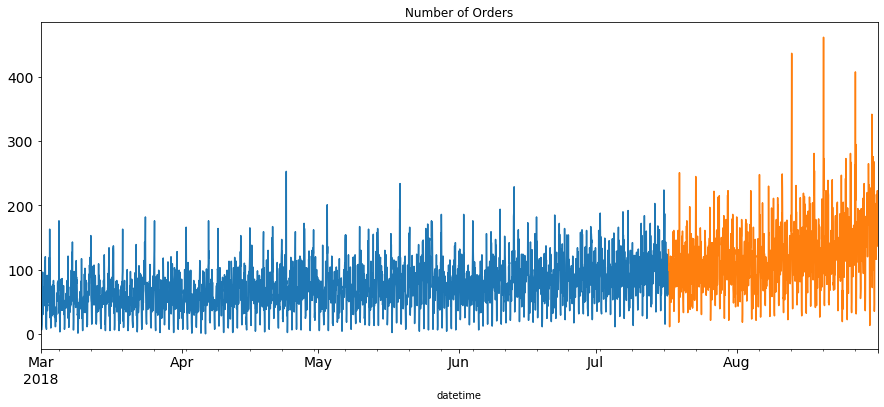

In [52]:
train.num_orders.plot(title='Number of Orders', figsize=(15, 6), fontsize=14)
test.num_orders.plot(title='Number of Orders', figsize=(15, 6), fontsize=14)
plt.show()

### Naive Approach

In [53]:
dd = np.asarray(train.num_orders)#features as an array
y_hat = test.copy()# test data

In [54]:
y_hat['naive'] = dd[len(dd)-1]

In [55]:
len(dd)-1

3311

In [56]:
#dd[3311]
train.iloc[-1]

num_orders    102
Name: 2018-07-16 23:00:00, dtype: int64

In [57]:
train.tail()

num_orders
datetime                       
2018-07-16 19:00:00          94
2018-07-16 20:00:00          61
2018-07-16 21:00:00         111
2018-07-16 22:00:00          85
2018-07-16 23:00:00         102

In [58]:
y_hat.tail()

num_orders  naive
datetime                              
2018-08-31 19:00:00         136    102
2018-08-31 20:00:00         154    102
2018-08-31 21:00:00         159    102
2018-08-31 22:00:00         223    102
2018-08-31 23:00:00         205    102

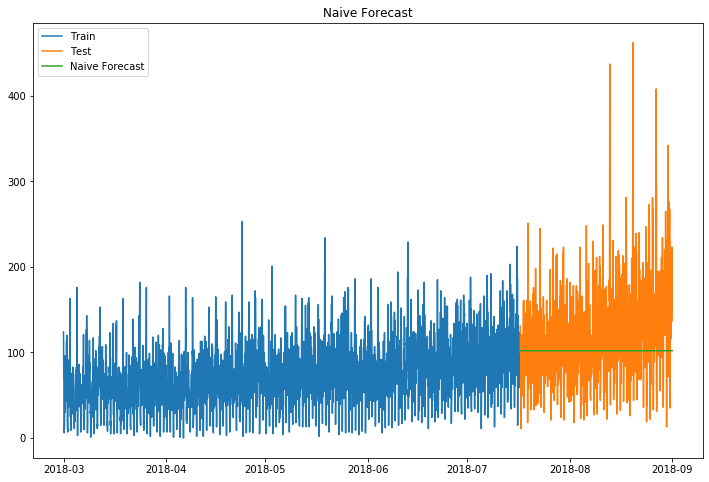

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
ax.legend()
ax.set_title('Naive Forecast')
plt.show()

In [60]:
naive_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['naive']))
print(naive_rmse)

55.5668663002943


### Simple Average

In [61]:
train['num_orders'].mean()

72.40640096618357

In [62]:
y_hat['average'] = train['num_orders'].mean()

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['average'], label='Average Forecast')
ax.legend(loc='best')
ax.set_title('Average Forecast')
plt.show()

In [64]:
average_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['average']))
print(average_rmse)

71.11089184572404


### Moving Average

In [65]:
y_hat['moving_average'] = train['num_orders'].rolling(100).mean().iloc[-1]

In [66]:
train['num_orders'].rolling(100).mean().iloc[-1]

101.33

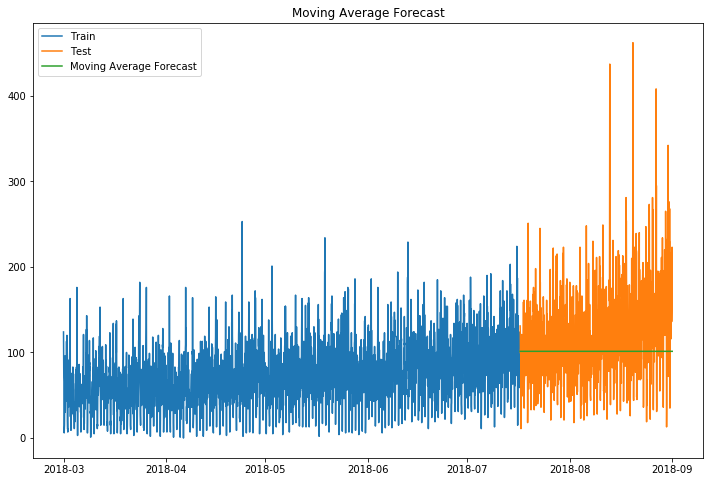

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['moving_average'], label='Moving Average Forecast')
ax.legend(loc='best')
ax.set_title('Moving Average Forecast')
plt.show()

In [68]:
moving_average_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['moving_average']))
print(moving_average_rmse)

55.79317076151157


In [348]:
data = pd.read_csv('datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [349]:
data.sort_index(inplace=True)

In [350]:
#resample the data by 1hour and find the mean to aggregate the values
data = data.resample('1H').sum()

In [351]:
decomposed = seasonal_decompose(data)
data_trend = pd.DataFrame(decomposed.trend)

In [352]:
data = data_trend.dropna()

In [353]:
data = data.resample('1H').sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-01 12:00:00 to 2018-08-31 11:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   trend   4392 non-null   float64
dtypes: float64(1)
memory usage: 68.6 KB


In [354]:
data.head()

trend
datetime                      
2018-03-01 12:00:00  56.125000
2018-03-01 13:00:00  56.145833
2018-03-01 14:00:00  56.958333
2018-03-01 15:00:00  57.000000
2018-03-01 16:00:00  56.479167

In [341]:
def my_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [355]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['trend'].shift(lag)

    data['rolling_mean'] = data['trend'].shift().rolling(rolling_mean_size).mean()


make_features(data, 3, 3)

In [356]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('trend', axis=1)
target_train = train['trend']
features_test = test.drop('trend', axis=1)
target_test = test['trend']
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(3949, 8) (440, 8) (3949,) (440,)


### Linear Regression training

In [357]:
model_lr = LinearRegression()
scores = cross_validate(model_lr, features_train, target_train, scoring=my_scorer, cv=3)
print(scores['test_score'].mean())

0.7356121116118849


In [358]:
model_lr.fit(features_train, target_train)
train_pred = model_lr.predict(features_train)
test_pred = model_lr.predict(features_test)

print("RMSE for the training set:", sqrt(mean_squared_error(target_train, train_pred)))
print("RMSE for the test set: ", sqrt(mean_squared_error(target_test, test_pred)))

RMSE for the training set: 0.732742915092275
RMSE for the test set:  1.4016370037119674


### Decision Tree

In [359]:
for i in range(1,11):
    model_dt = DecisionTreeRegressor(random_state=0, max_depth=i)
    scores = cross_validate(model_dt, features_train, target_train, scoring=my_scorer, cv=3)
    print("Max_depth =", i, ':', scores['test_score'].mean())

Max_depth = 1 : 17.637848336189894
Max_depth = 2 : 10.265498914193266
Max_depth = 3 : 6.224963618559449
Max_depth = 4 : 4.815234082056002
Max_depth = 5 : 3.7581571092084793
Max_depth = 6 : 3.859523026242092
Max_depth = 7 : 3.9021380461071806
Max_depth = 8 : 3.775297109171582
Max_depth = 9 : 3.794832750567398
Max_depth = 10 : 3.8108985834747195


In [360]:
model_dt = DecisionTreeRegressor(random_state=0, max_depth=5)
#print('Decision Tree training time:')
model_dt.fit(features_train, target_train)

#print('Decision Tree predicting time:')
dt_predictions = model_dt.predict(features_test)

rmse_dt = sqrt(mean_squared_error(target_test, dt_predictions))
print('Decision Tree RMSE:', rmse_dt)

Decision Tree RMSE: 15.06444652524522


### Random Forest

In [361]:
params = {'n_estimators': [70, 80, 90, 100],
          'max_depth': [10, 11, 12, 13]
         }
model_rf = RandomForestRegressor(random_state=0)

rf_search_obj = GridSearchCV(model_rf, params, scoring=my_scorer, cv=3)
rf_fit_obj =rf_search_obj.fit(features_train, target_train)

best_rf_model = rf_fit_obj.best_estimator_
print(best_rf_model)

RandomForestRegressor(max_depth=10, n_estimators=70, random_state=0)


In [362]:
#print('Random Forest training time:')
%time best_rf_model.fit(features_train, target_train)
#print('Random Forest predicting time:')
%time rf_predictions = best_rf_model.predict(features_test)

rmse_rf = sqrt(mean_squared_error(target_test, rf_predictions))
print('Random Forest RMSE:', rmse_rf)

Wall time: 866 ms
Wall time: 9 ms
Random Forest RMSE: 12.552260042827093


In [363]:
data.head()

trend  year  month  day  dayofweek      lag_1  \
datetime                                                                 
2018-03-01 12:00:00  56.125000  2018      3    1          3        NaN   
2018-03-01 13:00:00  56.145833  2018      3    1          3  56.125000   
2018-03-01 14:00:00  56.958333  2018      3    1          3  56.145833   
2018-03-01 15:00:00  57.000000  2018      3    1          3  56.958333   
2018-03-01 16:00:00  56.479167  2018      3    1          3  57.000000   

                         lag_2      lag_3  rolling_mean  
datetime                                                 
2018-03-01 12:00:00        NaN        NaN           NaN  
2018-03-01 13:00:00        NaN        NaN           NaN  
2018-03-01 14:00:00  56.125000        NaN           NaN  
2018-03-01 15:00:00  56.145833  56.125000     56.409722  
2018-03-01 16:00:00  56.958333  56.145833     56.701389